In [8]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [9]:
def read(filename):
    f = open(filename)
    raw = f.readlines()
    f.close()
    errors = set()
    err = 0
    k = ''

    data = {'No loss':[],'ADS-B':[],'Wi-Fi':[]}

    rates = set()

    for line in raw:
        ls = line.split()
        if "Error" in ls[0]:
            err = float(ls[1])
            if err < 0:
                err = 0
            continue

        if 'No' in ls[0] or 'ADS-B' in ls[0] or 'Wi-Fi' in ls[0]:
            k = ' '.join(ls)
            continue
        rates.add(float(ls[0]))
        data[k].append(float(ls[1]))
    r = list(rates)
    r.sort()
    return data, r


In [10]:
d,r = read('results.txt')

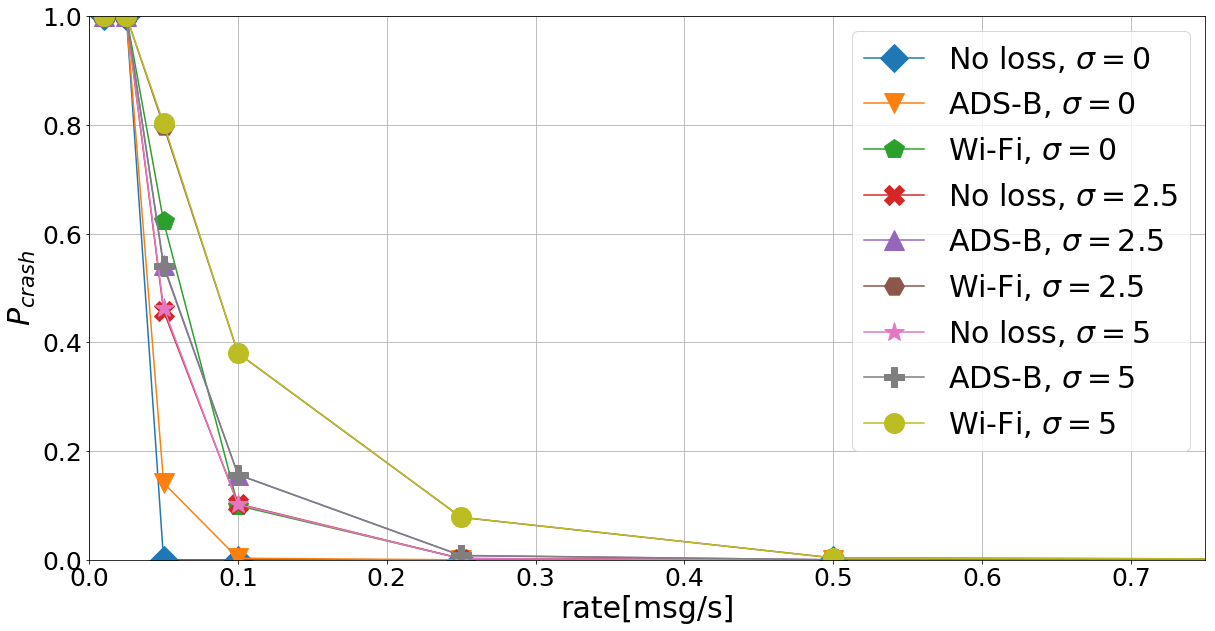

In [11]:
nlp0 = d['No loss'][0:len(r)]
adp0 = d['ADS-B'][0:len(r)]
wip0 = d['Wi-Fi'][0:len(r)]
nlp25 = d['No loss'][len(r):2*len(r)]
adp25 = d['ADS-B'][len(r):2*len(r)]
wip25 = d['Wi-Fi'][len(r):2*len(r)]
nlp5 = d['No loss'][2*len(r)::]
adp5 = d['ADS-B'][2*len(r)::]
wip5 = d['Wi-Fi'][2*len(r)::]
plt.plot(r,nlp0,'D-', label='No loss, $\sigma=0$', markersize=20)
plt.plot(r,adp0,'v-', label='ADS-B, $\sigma=0$', markersize=20)
plt.plot(r,wip0,'p-', label='Wi-Fi, $\sigma=0$', markersize=20)
plt.plot(r,nlp25,'X-', label='No loss, $\sigma=2.5~m$', markersize=20)
plt.plot(r,adp25,'^-', label='ADS-B, $\sigma=2.5~m$', markersize=20)
plt.plot(r,wip25,'H-', label='Wi-Fi, $\sigma=2.5~m$', markersize=20)
plt.plot(r,nlp5,'*-', label='No loss, $\sigma=5~m$', markersize=20)
plt.plot(r,adp5,'P-', label='ADS-B, $\sigma=5~m$', markersize=20)
plt.plot(r,wip5,'o-', label='Wi-Fi, $\sigma=5~m$', markersize=20)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.xlabel('rate[msg/s]',fontsize=30)
plt.ylabel('$P_{crash}$',fontsize=30)
plt.grid(True)
plt.legend(fontsize=30)
plt.axis([0,0.75,0,1])
plt.savefig('results.pdf',dpi=300,bbox_inches='tight')
plt.show()

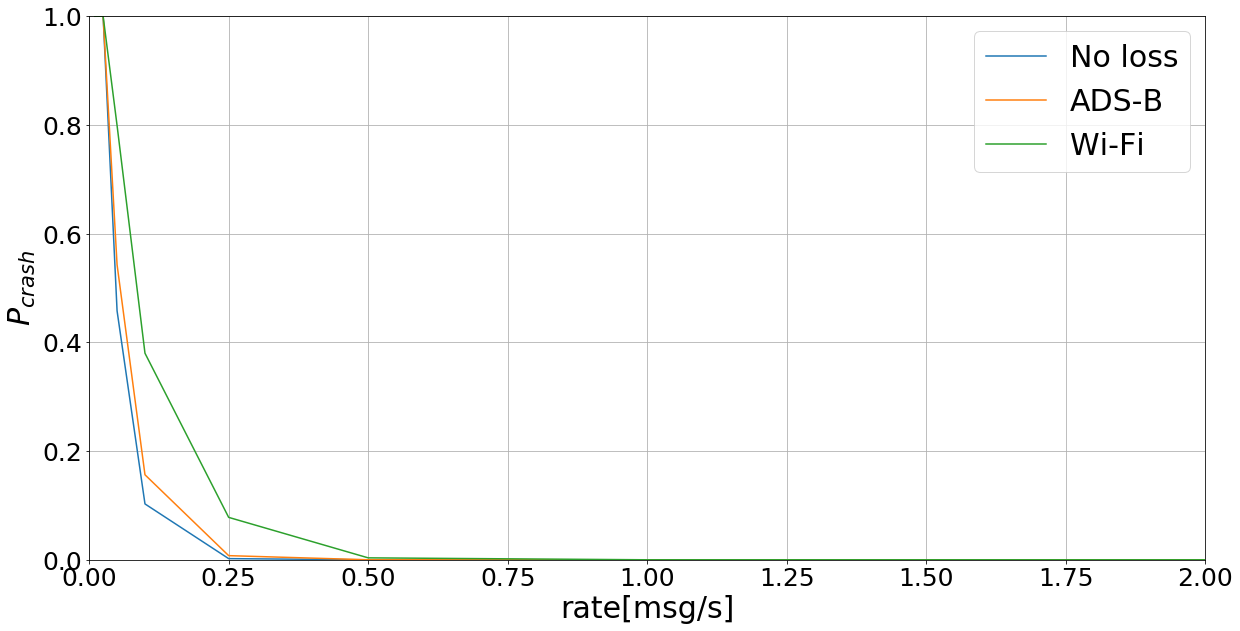

In [12]:
nlp = d['No loss'][len(r):2*len(r)]
adp = d['ADS-B'][len(r):2*len(r)]
wip = d['Wi-Fi'][len(r):2*len(r)]
plt.plot(r,nlp, label='No loss')
plt.plot(r,adp, label='ADS-B')
plt.plot(r,wip, label='Wi-Fi')
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.xlabel('rate[msg/s]',fontsize=30)
plt.ylabel('$P_{crash}$',fontsize=30)
plt.grid(True)
plt.legend(fontsize=30)
plt.axis([0,2,0,1])
plt.show()

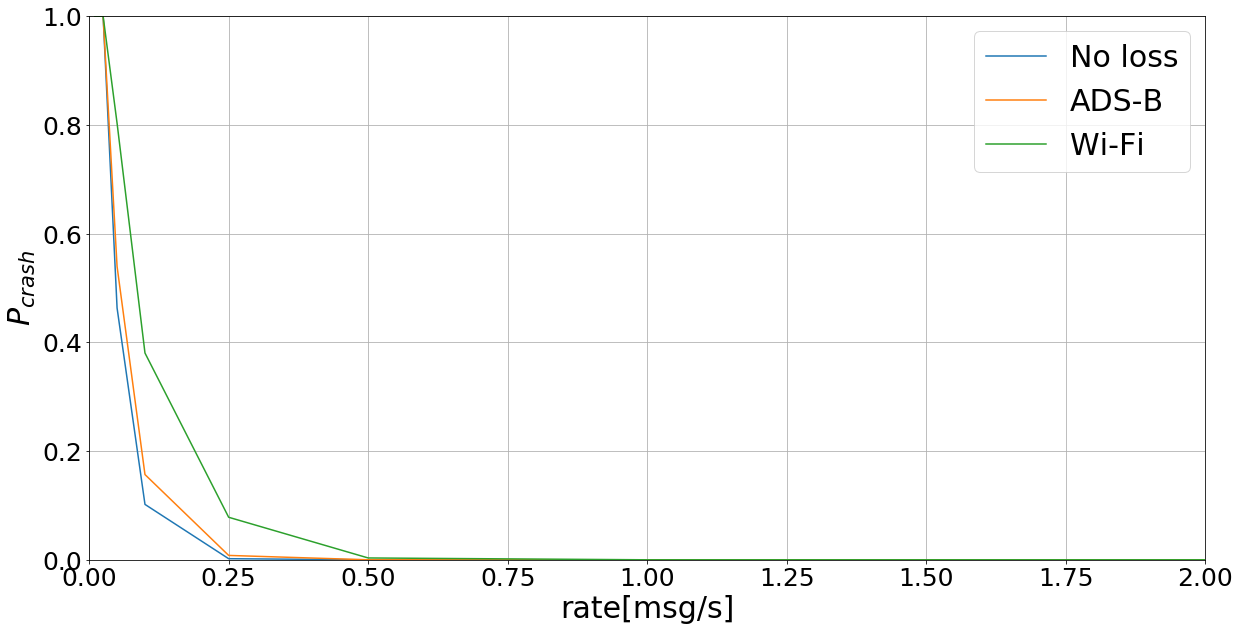

In [13]:
nlp = d['No loss'][2*len(r)::]
adp = d['ADS-B'][2*len(r)::]
wip = d['Wi-Fi'][2*len(r)::]
plt.plot(r,nlp, label='No loss')
plt.plot(r,adp, label='ADS-B')
plt.plot(r,wip, label='Wi-Fi')
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.xlabel('rate[msg/s]',fontsize=30)
plt.ylabel('$P_{crash}$',fontsize=30)
plt.grid(True)
plt.legend(fontsize=30)
plt.axis([0,2,0,1])
plt.show()